In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
kf=pd.read_csv('data/kiva_loans.csv')
kf.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


female                                                                                                                                                            426502
male                                                                                                                                                              134710
female, female                                                                                                                                                     12164
female, female, female                                                                                                                                             11676
female, female, female, female                                                                                                                                      9052
                                                                                                                                                           

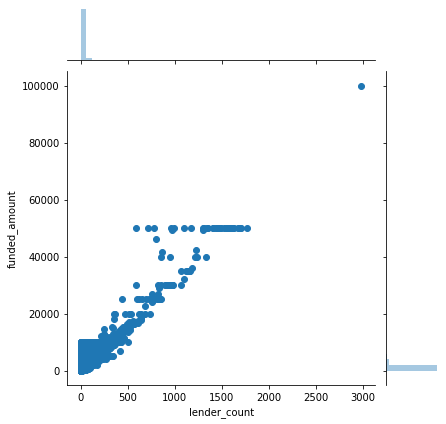

In [80]:
print(kf['borrower_genders'].value_counts())

sns.jointplot(x ="lender_count", y ="funded_amount", data = kf)
#a very skewed distribution - surprising at first, but it actually isn't since its a platform to enable people to make ends meet

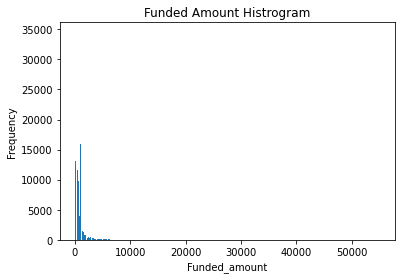

In [9]:
#more in-depth research of how much money people general want to lend
binsVal = np.arange(0,55000,20)
binsVal

# create the plot
plt.hist(kf['funded_amount'], bins = binsVal)

# Set the title and labels
plt.xlabel('Funded_amount')
plt.ylabel('Frequency')
plt.title('Funded Amount Histrogram')

# show the plot
plt.show()

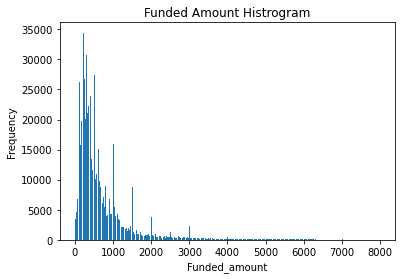

In [11]:
# create bins interval using numpy
binsVal = np.arange(0,8000,20)
binsVal

# create the plot
plt.hist(kf['funded_amount'], bins = binsVal)

# Set the title and labels
plt.xlabel('Funded_amount')
plt.ylabel('Frequency')
plt.title('Funded Amount Histrogram')

# show the plot
plt.show()

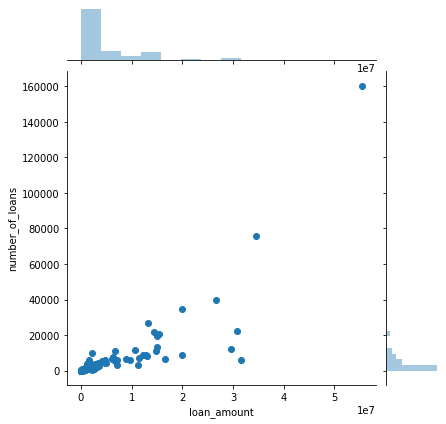

In [36]:
national=pd.DataFrame(kf.groupby(by='country').sum()['loan_amount'])
national['number_of_loans']=kf.groupby(by='country').count()['id']
national['average_of_loans']=national.loan_amount/national.number_of_loans
sns.jointplot(x ="loan_amount", y ="number_of_loans", data = national)


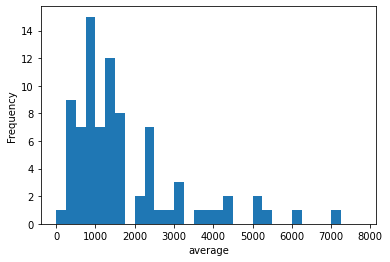

In [75]:
#average amount of money - poor countries at the bottom and rich at the top???
binsVal = np.arange(0,8000,250)

# create the plot
plt.hist(national['average_of_loans'], bins = binsVal)

# Set the title and labels
plt.xlabel('average')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [77]:
national.sort_values(by='average_of_loans',ascending=False).head(10)

,loan_amount,number_of_loans,average_of_loans
country,,,
Cote D'Ivoire,50000.0,1,50000.000000
Mauritania,15000.0,1,15000.000000
Chile,122650.0,10,12265.000000
Bhutan,20000.0,2,10000.000000
Afghanistan,14000.0,2,7000.000000
Congo,786250.0,128,6142.578125
Puerto Rico,371400.0,68,5461.764706
United States,31496375.0,6093,5169.272116
Virgin Islands,10000.0,2,5000.000000


In [79]:
national.sort_values(by='average_of_loans',ascending=True).head(10)

,loan_amount,number_of_loans,average_of_loans
country,,,
Nigeria,2205550.0,10136,217.595699
Togo,1536375.0,5749,267.242129
Madagascar,1236025.0,3821,323.482073
Liberia,1197825.0,3682,325.319120
Philippines,55342225.0,160441,344.938170
Cameroon,936350.0,2230,419.887892
Nepal,307625.0,717,429.044630
Turkey,743800.0,1703,436.758661
Kenya,34534300.0,75825,455.447412


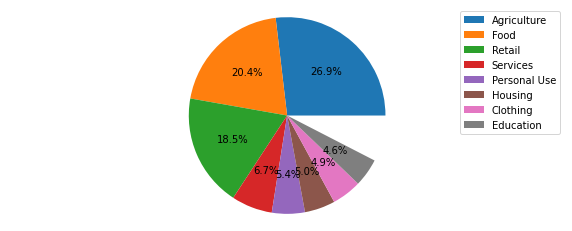

,id,percentages
sector,,
Agriculture,180302,0.268624
Food,136657,0.203599
Retail,124494,0.185478
Services,45140,0.067252
Personal Use,36385,0.054208
Housing,33731,0.050254
Clothing,32742,0.048781
Education,31013,0.046205


In [138]:
categories=pd.DataFrame(kf.groupby(by='sector').count()['id'])
categories['percentages']=categories/kf.shape[0]
categories.index.values

categories=categories.sort_values(by='percentages',ascending=False)
smaller=categories[categories['percentages']<0.04]

# small_set=[smaller.sum()]
categories=categories[categories['percentages']>=0.04]
# categories.append(small_set)


fig1, ax1 = plt.subplots()
ax1.pie(x=categories.percentages, autopct='%1.1f%%')       
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(categories.index.values)
fig1.set_figwidth(10)
plt.show()

categories